In [87]:
import pandas as pd
# from pandas.io import gbq
import pandas_gbq
import pydata_google_auth
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [88]:
df = pd.read_csv('coding_challenge.csv')
df.head()

,date,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature,total_precipitation,snow_depth,fog,snow,hail,thunder
0,2006-01-24,725300,33.200001,26.799999,1008.500000,7.0,15.2,23.000000,0.0,1.20,False,False,False,False
1,2006-01-25,725300,33.299999,21.400000,1021.099976,10.0,14.0,28.900000,0.0,1.20,False,False,False,False
2,2006-01-26,725300,30.299999,19.700001,1031.400024,9.9,4.6,19.400000,0.0,2.66,False,False,False,False
3,2006-01-27,725300,39.900002,25.299999,1027.599976,10.0,10.7,35.599998,0.0,2.66,False,False,False,False
4,2006-01-28,725300,43.200001,33.799999,1019.900024,9.4,6.6,35.099998,0.0,2.66,False,False,False,False


In [89]:
%load_ext google.cloud.bigquery

# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information form over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 12 years ago. So if today is 2021.02.15 then the weather we want to forecast is for the date 2009.02.16. You are suppsed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to used BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is, to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck at the first part, you can use the replacement data provided in the second part

In [90]:
def implicit():
    from google.cloud import storage

    # If you don't specify credentials when constructing the client, the
    # client library will look for credentials in the environment.
    storage_client = storage.Client()

    # Make an authenticated API request
    buckets = list(storage_client.list_buckets())
    print(buckets)

In [91]:
SCOPES = [
    'https://www.googleapis.com/auth/cloud-platform',
    'https://www.googleapis.com/auth/drive',
]

credentials = pydata_google_auth.get_user_credentials(
    SCOPES,
    # Set auth_local_webserver to True to have a slightly more convienient
    # authorization flow. Note, this doesn't work if you're running from a
    # notebook on a remote sever, such as over SSH or with Google Colab.
    auth_local_webserver=True,
)

df = pandas_gbq.read_gbq(
    """SELECT *, CONCAT(year, '-', month, '-', day) as date
FROM `bigquery-public-data.samples.gsod`
WHERE (station_number between 725300 and 726300)
    AND (year between 2005 and 2009)
LIMIT 20
"""
    ,
    project_id='my-project-7-331316',
    credentials=credentials,
)
df.head(20)

Downloading: 100%|██████████| 20/20 [00:00<00:00, 59.44rows/s]


,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,date
0,726165,99999,2005,3,18,37.900002,4,12.200000,4,NaN,...,None,0.00,NaN,False,False,False,False,False,False,2005-3-18
1,725835,99999,2005,9,12,59.900002,4,23.900000,4,NaN,...,None,0.00,NaN,False,False,False,False,False,False,2005-9-12
2,725868,99999,2005,5,30,57.599998,5,43.900002,5,NaN,...,None,0.00,NaN,False,False,False,False,False,False,2005-5-30
3,725835,99999,2005,3,3,46.400002,6,30.500000,6,NaN,...,None,0.17,NaN,False,False,False,False,False,False,2005-3-3
4,725868,99999,2005,9,22,53.299999,6,43.700001,6,NaN,...,None,0.07,NaN,False,False,False,False,False,False,2005-9-22
5,725477,99999,2005,5,3,55.400002,7,19.400000,7,NaN,...,None,0.00,NaN,False,False,False,False,False,False,2005-5-3
6,725466,99999,2005,5,29,63.700001,8,48.000000,8,NaN,...,None,0.00,NaN,False,False,False,False,False,False,2005-5-29
7,725476,99999,2005,11,30,22.400000,9,9.400000,9,NaN,...,None,0.00,NaN,False,False,False,False,False,False,2005-11-30
8,725786,99999,2005,3,10,46.400002,9,33.400002,9,NaN,...,None,0.00,NaN,False,False,False,False,False,False,2005-3-10
9,725869,99999,2005,5,14,58.599998,10,42.299999,10,NaN,...,None,0.00,NaN,False,False,False,False,False,False,2005-5-14


## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2005 till 2009 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

In [92]:
import pandas_gbq
import pydata_google_auth

SCOPES = [
    'https://www.googleapis.com/auth/cloud-platform',
    'https://www.googleapis.com/auth/drive',
]

credentials = pydata_google_auth.get_user_credentials(
    SCOPES,
    # Set auth_local_webserver to True to have a slightly more convienient
    # authorization flow. Note, this doesn't work if you're running from a
    # notebook on a remote sever, such as over SSH or with Google Colab.
    auth_local_webserver=True,
)

df = pandas_gbq.read_gbq(
    """SELECT CONCAT(year, '-', month, '-', day) as date, *
FROM `bigquery-public-data.samples.gsod`
WHERE (station_number between 725300 and 726300)
    AND (year between 2005 and 2009)
"""
    ,
    project_id='my-project-7-331316',
    credentials=credentials,
)
df.head(20)

Downloading: 100%|██████████| 377784/377784 [01:44<00:00, 3605.41rows/s]


,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,2005-3-18,726165,99999,2005,3,18,37.900002,4,12.200000,4.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False
1,2005-9-12,725835,99999,2005,9,12,59.900002,4,23.900000,4.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False
2,2005-5-30,725868,99999,2005,5,30,57.599998,5,43.900002,5.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False
3,2005-3-3,725835,99999,2005,3,3,46.400002,6,30.500000,6.0,...,NaN,None,0.17,NaN,False,False,False,False,False,False
4,2005-9-22,725868,99999,2005,9,22,53.299999,6,43.700001,6.0,...,NaN,None,0.07,NaN,False,False,False,False,False,False
5,2005-5-3,725477,99999,2005,5,3,55.400002,7,19.400000,7.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False
6,2005-5-29,725466,99999,2005,5,29,63.700001,8,48.000000,8.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False
7,2005-11-30,725476,99999,2005,11,30,22.400000,9,9.400000,9.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False
8,2005-3-10,725786,99999,2005,3,10,46.400002,9,33.400002,9.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False
9,2005-5-14,725869,99999,2005,5,14,58.599998,10,42.299999,10.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False


### 2. Task 
From here want to work with the data from all stations 725300 to 725330 that have information from 2005 till 2009. 

In [93]:
df.sort_values('date')

,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
335507,2005-1-1,725621,99999,2005,1,1,29.200001,24,21.600000,24.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False
108426,2005-1-1,725835,99999,2005,1,1,28.400000,4,24.299999,4.0,...,NaN,None,0.09,7.1,False,False,False,False,False,False
251240,2005-1-1,725825,24121,2005,1,1,14.200000,24,11.100000,24.0,...,NaN,None,0.14,NaN,True,True,True,True,True,True
5832,2005-1-1,725390,14836,2005,1,1,32.400002,24,22.799999,24.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False
373345,2005-1-1,725700,99999,2005,1,1,35.799999,24,21.400000,24.0,...,NaN,None,0.04,NaN,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372359,2009-9-9,725468,4910,2009,9,9,69.900002,24,63.500000,24.0,...,NaN,None,0.00,NaN,True,True,True,True,True,True
339363,2009-9-9,725474,4915,2009,9,9,68.099998,24,60.200001,24.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False
114766,2009-9-9,726170,14742,2009,9,9,63.299999,24,53.599998,24.0,...,NaN,None,0.00,NaN,True,True,True,True,True,True
29329,2009-9-9,725500,14942,2009,9,9,72.400002,24,63.900002,24.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False


Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate. 

### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for is the following, and hence should constitute your test set.

In [94]:
import datetime, timedelta

str(datetime.datetime.today()- datetime.timedelta(days=12*365)).split(' ')[0]


ModuleNotFoundError: No module named 'timedelta'

In [95]:
df = df.fillna(0)

In [96]:
df_subset = df[['mean_temp','mean_dew_point','mean_sealevel_pressure','mean_station_pressure','mean_visibility','mean_wind_speed','max_sustained_wind_speed','max_gust_wind_speed','max_temperature','max_temperature_explicit','min_temperature','min_temperature_explicit','total_precipitation','snow_depth','fog','rain','snow','hail','thunder','tornado']]

In [97]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_subset, test_size = 0.15, random_state = 42)
train2, val = train_test_split(train, test_size = 0.15, random_state = 42)

In [98]:
train.head()

,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_station_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
364774,75.699997,69.800003,0.000000,0.0,10.0,14.800000,21.000000,27.000000,71.599998,True,0.0,0,0.0,0.0,False,False,False,False,False,False
82096,31.700001,21.500000,0.000000,0.0,9.5,20.299999,32.099998,42.900002,30.200001,True,0.0,0,0.0,0.0,False,False,False,False,False,False
226702,71.500000,64.199997,0.000000,0.0,4.9,7.300000,11.100000,15.000000,64.400002,True,0.0,0,0.0,0.0,False,False,False,False,False,False
173322,58.599998,48.700001,1024.099976,0.0,7.6,3.600000,8.000000,0.000000,50.000000,False,0.0,0,0.0,0.0,False,False,False,False,False,False
153735,34.099998,27.600000,1012.000000,0.0,10.0,2.300000,7.000000,0.000000,26.600000,True,0.0,0,0.0,0.0,False,False,False,False,False,False


## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an Algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [99]:
import datetime, timedelta

str(datetime.datetime.today()- datetime.timedelta(days=12*365)).split(' ')[0]

ModuleNotFoundError: No module named 'timedelta'

You are allowed to use any library you are comfortable with such as sklearn, tensorflow keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

In [100]:
# Random Forest

In [101]:
feature_names = ['mean_temp','mean_dew_point','mean_sealevel_pressure','mean_station_pressure','mean_visibility','mean_wind_speed','max_sustained_wind_speed','max_gust_wind_speed','max_temperature','max_temperature_explicit','min_temperature','min_temperature_explicit','total_precipitation','snow_depth']
X = df[feature_names].values
y = df['snow'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101) # Seed

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
first_row = X_test[0]
print("prediction:", rf.predict([first_row]))
print("true value:", y_test[0])

prediction: [False]
true value: False


In [102]:
# Accuracy Random Forest
print("random forest accuracy:", rf.score(X_test, y_test))

random forest accuracy: 0.9224106897062871


In [103]:
# Accuracy Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("decision tree accuracy:", dt.score(X_test, y_test))

decision tree accuracy: 0.8876077335196833


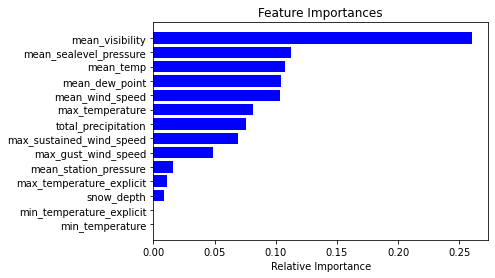

In [104]:
# Feature Importance

import numpy as np
import matplotlib.pyplot as plt

features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
print(clf.predict([[0, 0, 0, 0]]))

[1]


>10 0.869 (0.024)
>50 0.901 (0.022)
>100 0.906 (0.028)
>500 0.908 (0.024)
>1000 0.906 (0.024)


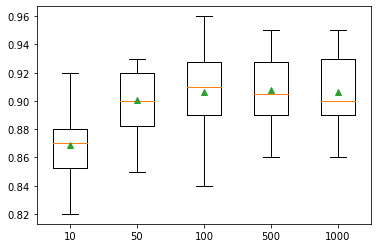

In [106]:
# explore random forest number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000]
	for n in n_trees:
		models[str(n)] = RandomForestClassifier(n_estimators=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.891 (0.025)
>2 0.901 (0.028)
>3 0.895 (0.030)
>4 0.903 (0.024)
>5 0.904 (0.028)
>6 0.901 (0.025)
>7 0.898 (0.026)
>8 0.896 (0.025)
>9 0.895 (0.028)
>10 0.895 (0.025)
>11 0.892 (0.025)
>12 0.894 (0.030)
>13 0.891 (0.020)
>14 0.891 (0.030)


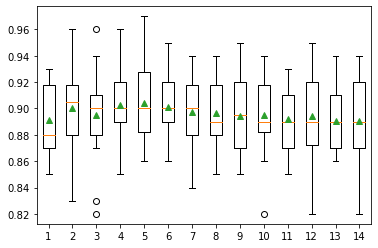

In [28]:
# explore random forest number of features effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 14
	for i in range(1,15):
		models[str(i)] = RandomForestClassifier(max_features=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [124]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [ ]:
# Gradient Boosting

In [129]:
# evaluate gradient boosting algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = GradientBoostingClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.898 (0.031)


In [126]:
# make predictions using gradient boosting for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = GradientBoostingClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [0.2929949, -4.21223056, -1.288332, -2.17849815, -0.64527665, 2.58097719, 0.28422388, -7.1827928, -1.91211104, 2.73729512, 0.81395695, 3.96973717, -2.66939799, 3.34692332, 4.19791821, 0.99990998, -0.30201875, -4.43170633, -2.82646737, 0.44916808]
yhat = model.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


>10 0.830 (0.037)
>50 0.879 (0.033)
>100 0.899 (0.030)
>500 0.919 (0.026)
>1000 0.919 (0.029)
>5000 0.920 (0.025)


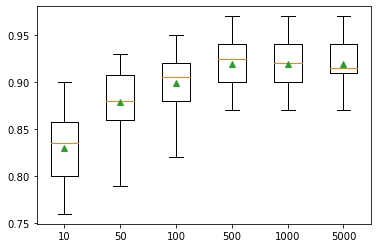

In [127]:
# explore gradient boosting number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = GradientBoostingClassifier(n_estimators=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [128]:
# example of grid searching key hyperparameters for gradient boosting on a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model with default hyperparameters
model = GradientBoostingClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.946333 using {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.7}
0.531667 (0.096301) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.523667 (0.072041) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.524000 (0.072874) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.767667 (0.033335) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
0.771000 (0.037714) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
0.738667 (0.049982) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
0.829333 (0.029769) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.813333 (0.041177) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.761000 (0.043077) with: {'learning_rate': 0.0001,

In [133]:
# example of grid searching key hyperparameters for gradient boosting on a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model with default hyperparameters
model = GradientBoostingClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [500]
grid['learning_rate'] = [0.1]
grid['subsample'] = [0.7]
grid['max_depth'] = [7]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.949333 using {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.7}
0.949333 (0.021746) with: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.7}
